## student performance model
## life cycle of a machine learing project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

it ise a REGRESSION data set

## 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.
* 2.1 Import Data and Required Packages *
* Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("data/stud.csv")

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2.2 Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score
## 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# There are no missing values in the data set
3. 2 Check Duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

# There are no duplicates values in the data set
3. 3 Check data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the number of unique values of each column

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 3.5 Check statistics of data set

In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* Insight
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17
## 3.7 Exploring Data

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
# defing numeric columns or categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = [col for col in df.columns if col not in numeric_cols]

In [31]:
print("thse are the numeric features:-> ",numeric_cols,"\nthese are the categorical features:-> ", categorical_cols)

thse are the numeric features:->  ['math_score', 'reading_score', 'writing_score'] 
these are the categorical features:->  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8 Adding columns for "Total Score" and "Average"

In [37]:
df['total_score'] = df[numeric_cols].sum(axis=1)
df['average_score'] = df['total_score'] / len(numeric_cols)

In [60]:

reading_score= df[df['reading_score']==100]['average_score'].count()
writting_score= df[df['writing_score']==100]['average_score'].count()
math_score= df[df['math_score']==100]['average_score'].count()

print("number of students with 100 in reading score:-> ",reading_score)
print("number of students with 100 in writting score:-> ",writting_score    )
print("number of students with 100 in math score:-> ",math_score)

number of students with 100 in reading score:->  17
number of students with 100 in writting score:->  14
number of students with 100 in math score:->  7


In [59]:
reading_less_30= df[df['reading_score']<30]['average_score'].count()
writting_less_30= df[df['writing_score']<30]['average_score'].count()
math_less_30= df[df['math_score']<30]['average_score'].count()

print("number of students with less than 30 in reading score:-> ",reading_less_30)
print("number of students with less than 30 in writting score:-> ",writting_less_30    )
print("number of students with less than 30 in math score:-> ",math_less_30)

number of students with less than 30 in reading score:->  8
number of students with less than 30 in writting score:->  9
number of students with less than 30 in math score:->  14


Insights
* From above values we get students have performed the worst in Maths
* Best performance is in reading section
## 4. Exploring Data ( Visualization )
# 4.1 Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)
# 4.1.1 Histogram & KDE

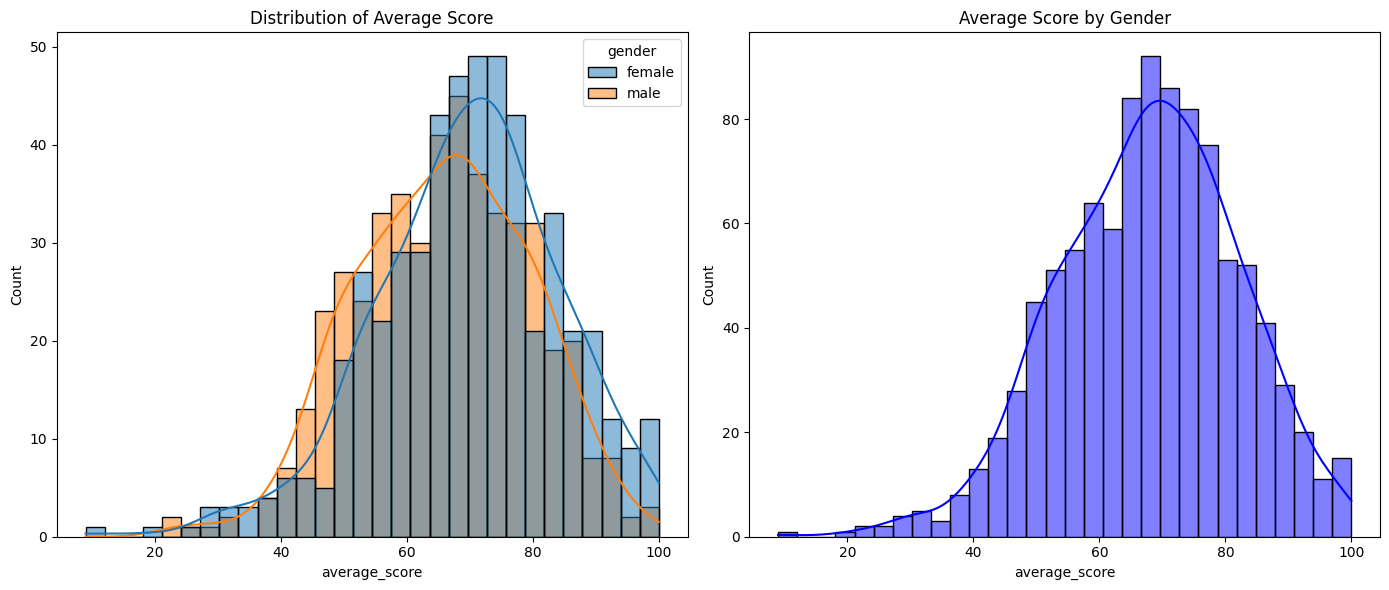

In [77]:

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Distribution of average_score
sns.histplot(df['average_score'], kde=True, bins=30, ax=axes[1], color='blue')
axes[0].set_title("Distribution of Average Score")

# Plot 2: Distribution by gender
sns.histplot(data=df, x='average_score', kde=True, bins=30, ax=axes[0], hue='gender')
axes[1].set_title("Average Score by Gender")

plt.tight_layout()
plt.show()

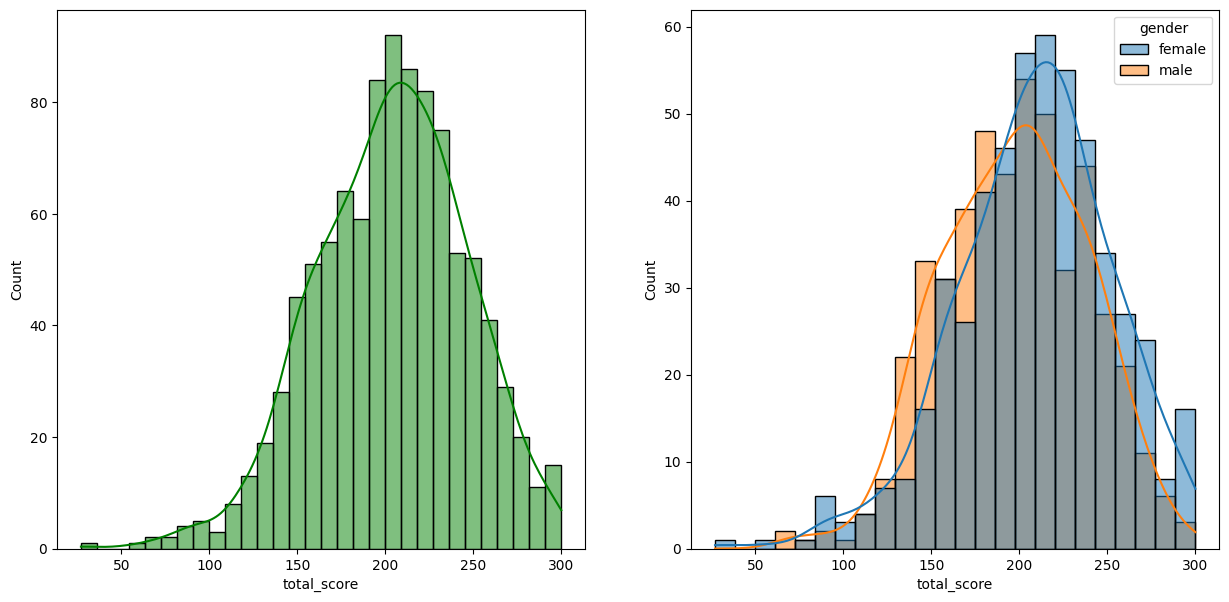

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

In [84]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

## 4.2 Multivariate analysis using pieplot

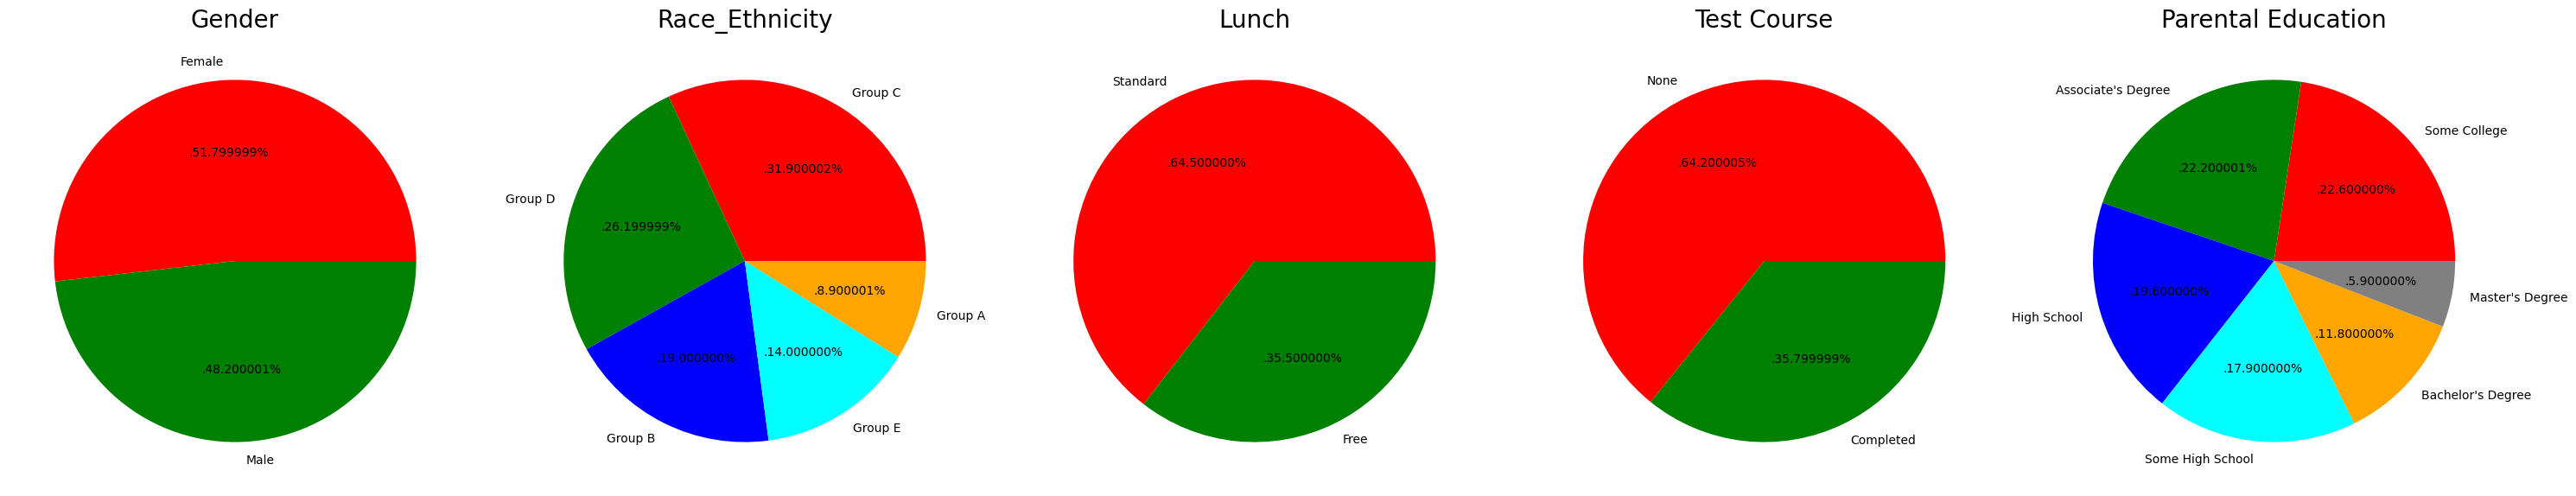

In [85]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## 4.3 GENDER COLUMN
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?</br>
UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

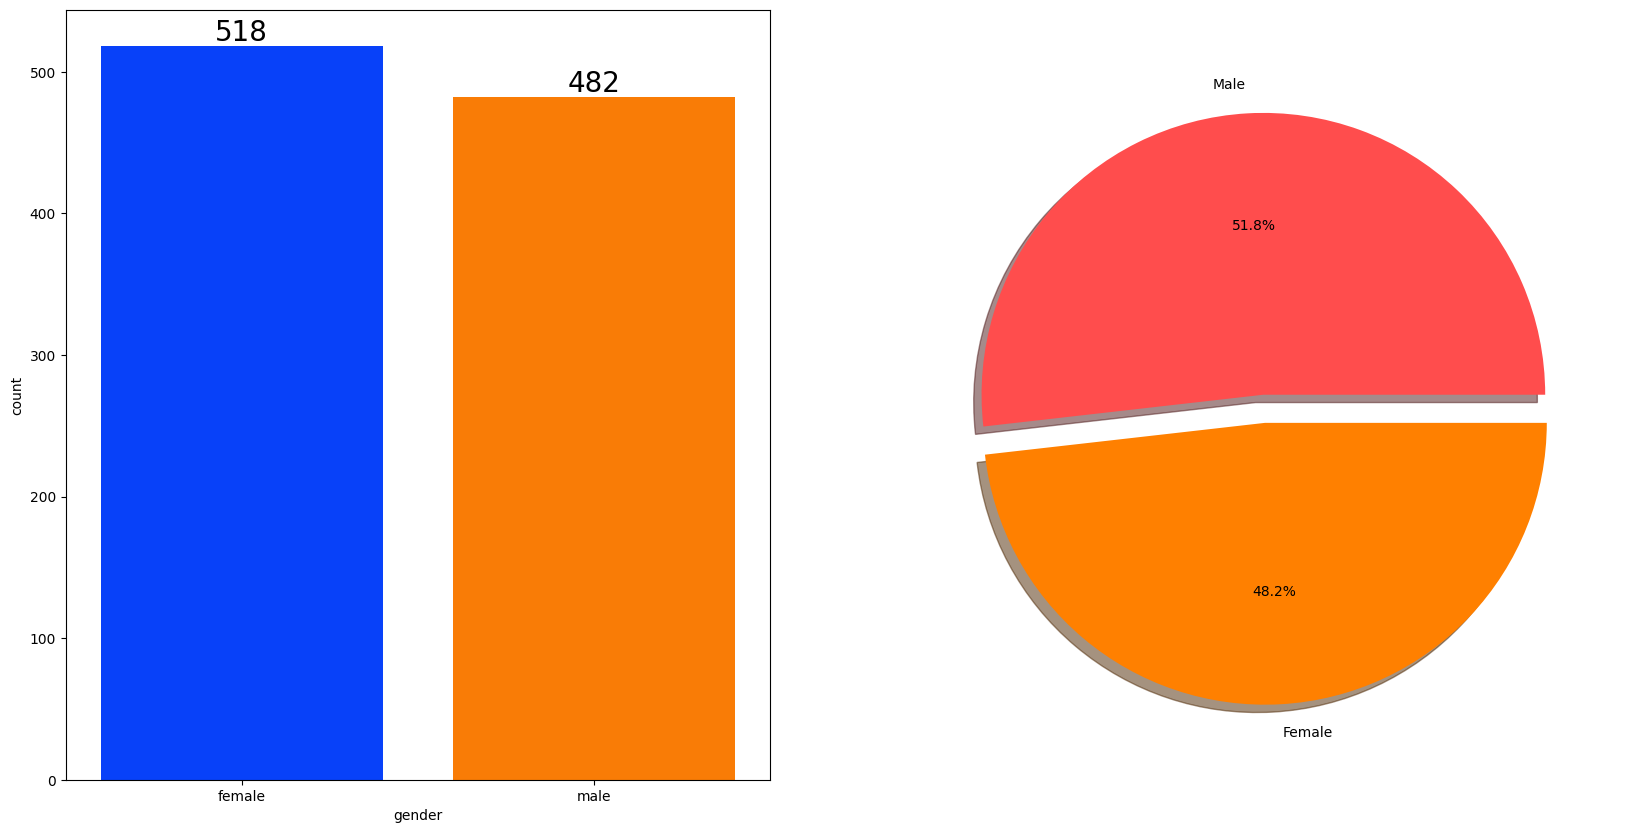

In [88]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

# 4.4 CHECKING OUTLIERS

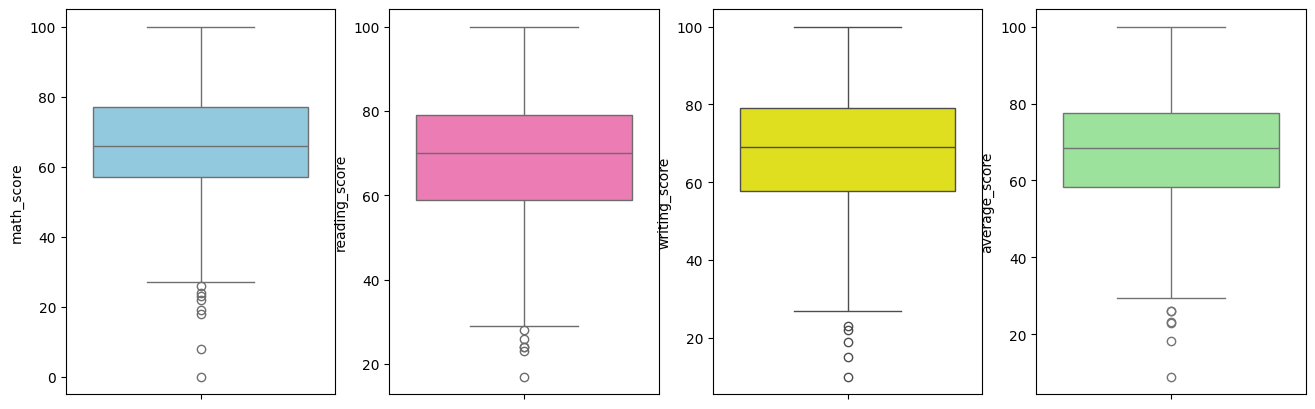

In [ ]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

# Insights
* From the above plot it is clear that all the scores increase linearly with each other.
## 5. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.